<a href="https://colab.research.google.com/github/annasroka10/ML-final-project/blob/main/Final_project_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **What is the dataset about?**


The dataset contains information about people and their medical expenses (insurance charges). It has factors like:


1.   Age (how old the person is)
2.   Sex (gender)
3. BMI (Body Mass Index)
4. Children (how many children they have)
5. Smoker (whether they smoke or not)
6. Region (where they live)
7. Charges (the medical cost or insurance charge)


This data is used to predict how much a new person might pay for medical insurance based on their details.

**Problem Statement:**

`What factors impact medical expenses the most?`

We want to know which factors, like age or smoking, have the biggest effect on medical costs.

`How accurate can we predict medical expenses?`

We will build a machine learning model to predict how much someone will pay based on their data (age, smoking, etc.) and see how accurate the predictions are.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv('medical_insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


# **Checking for missing data** 🔍

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


The dataset contains 2772 entries with no missing values across 7 columns.

In [75]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [76]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


# **Converting Categorical Features to Numerical**

In [77]:
categ_to_num = {'sex': {'male' : 0 , 'female' : 1},
              'smoker': {'no': 0 , 'yes' : 1},
              'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
             }

df.replace(categ_to_num, inplace = True)

<ipython-input-77-a0051de11a9f>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(categ_to_num, inplace = True)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


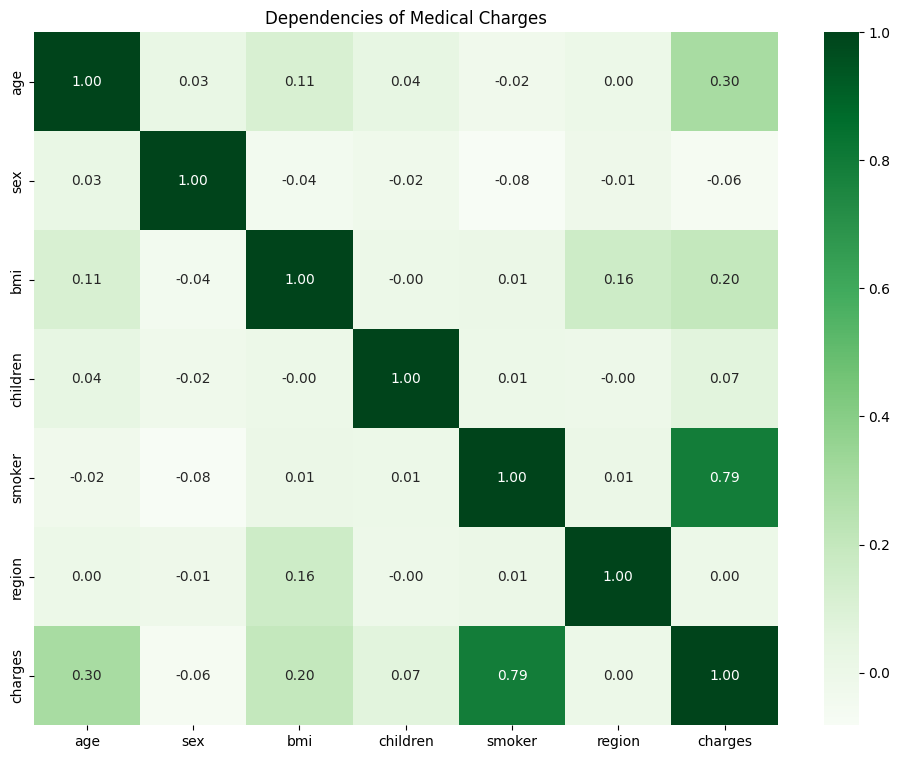

In [79]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, cmap='Greens', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('Cor')
plt.show()

The heatmap above shows that the columns sex, children, and region have little to no correlation with medical charges, suggesting that these factors have minimal impact on the charges.

The columns age, bmi, and especially smoker show a stronger correlation with charges.
Specifically, smoker has a very strong positive correlation.

<ipython-input-80-fea06cdaed47>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='charges', data=df, palette='BuGn')


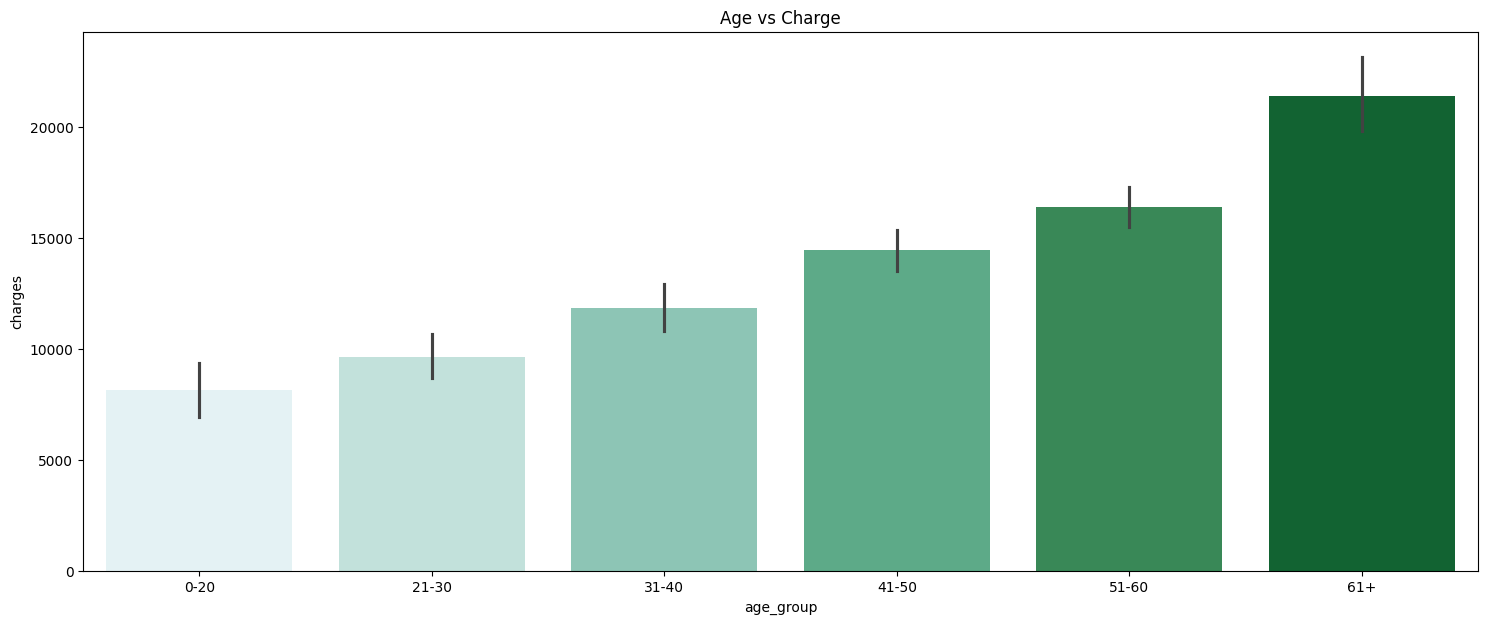

In [80]:
#df['age_bins'] = pd.cut(df['age'], bins=10)
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(18,7))
plt.title('Age vs Charge')
sns.barplot(x='age_group', y='charges', data=df, palette='BuGn')
plt.savefig('AgevsCharges')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

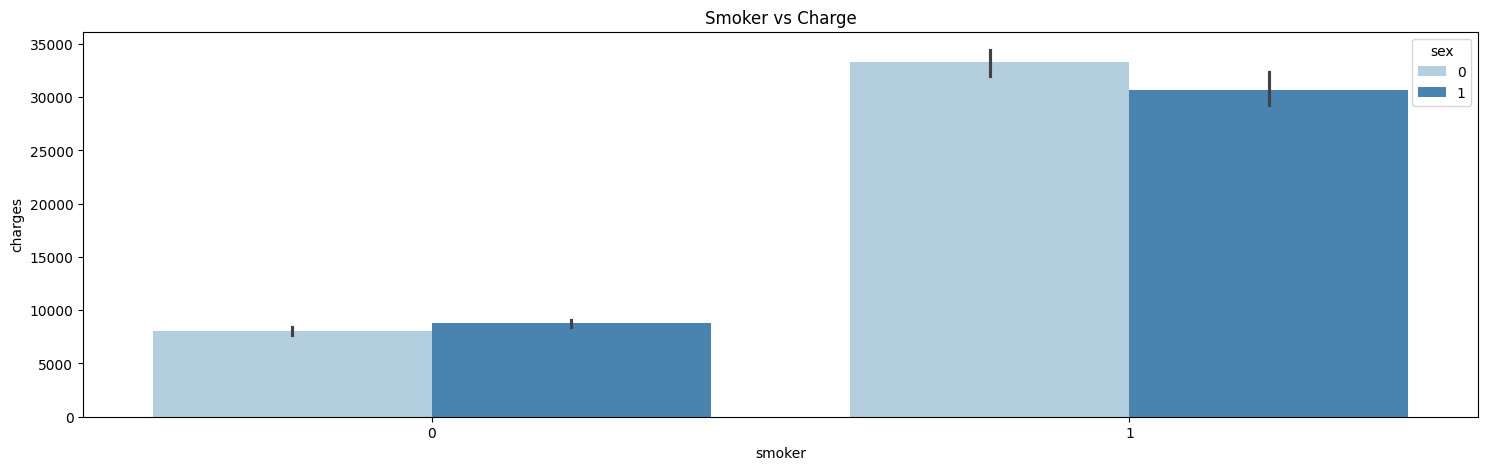

In [81]:
plt.figure(figsize=(18,5))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')

From the above barplot, we can clearly see that smokers pay higher charges for their medical insurance.

 **Split Datasets to Train and Test**

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,sex,bmi,children,smoker,region,age_group
1864,21,0,36.85,0,0,2,21-30
1997,38,1,34.80,2,0,3,31-40
1336,21,1,25.80,0,0,3,21-30
655,52,1,25.30,2,1,2,51-60
261,20,1,26.84,1,1,2,21-30


# Preprocessing

In [83]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


In [84]:
# Finds percentage of outliers + specific outliers in a given column of a DataFrame using the IQR method.
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)
    # Return the percentage of outliers
    percent_outliers = (len(outliers) / len(data)) * 100
    print(f"\nPercentage of outliers: {percent_outliers:.2f}%")
    return percent_outliers


In [85]:
# Your Code Here
find_outliers_iqr(df, 'age')
find_outliers_iqr(df, 'sex')
find_outliers_iqr(df, 'bmi')
find_outliers_iqr(df, 'children')
find_outliers_iqr(df, 'smoker')
find_outliers_iqr(df, 'region')
find_outliers_iqr(df, 'charges')


Outliers in age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, age_group]
Index: []

Percentage of outliers: 0.00%
Outliers in sex:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, age_group]
Index: []

Percentage of outliers: 0.00%
Outliers in bmi:
      age  sex    bmi  children  smoker  region     charges age_group
116    58    0  49.06         0       0       2  11381.3254     51-60
286    46    1  48.07         2       0       1   9432.9253     41-50
847    23    0  50.38         1       0       2   2438.0552     21-30
860    37    1  47.60         2       1       3  46113.5110     31-40
1047   22    0  52.58         1       1       2  44501.3982     21-30
1088   52    0  47.74         1       0       2   9748.9106     51-60
1317   18    0  53.13         0       0       2   1163.4627      0-20
1502   58    0  49.06         0       0       2  11381.3254     51-60
1672   46    1  48.07         2       0       1   9432.9253    

10.678210678210679

**Data Normalization**

In [86]:
# Get outlier rows using existing find_outliers_iqr function
outliers = find_outliers_iqr(df, 'charges')

# Create High Volume flag column
df['High charges'] = False
df.loc[outliers, 'High charges'] = True

# Create normalized version excluding outliers from min/max calculation
df_normalized = df.copy()
normal_volumes = df[df['High charges'] == False]['charges']
min_val = normal_volumes.min()
max_val = normal_volumes.max()

# Apply normalization to all data using non-outlier min/max
df_normalized['Volume_Normalized'] = (df['charges'] - min_val) / (max_val - min_val)

# Print some statistics to verify
print("\nVerification stats:")
print("Number of high charges:", df['High charges'].sum())
print("Percentage of charges: {:.2f}%".format(df['High charges'].mean() * 100))

# Show head of results
print("\nSample of normalized data:")
print(df_normalized.head())

Outliers in charges:
      age  sex    bmi  children  smoker  region     charges age_group
14     27    0  42.13         0       1       2  39611.7577     21-30
19     30    0  35.30         0       1       3  36837.4670     31-40
23     34    1  31.92         1       1       1  37701.8768     31-40
29     31    0  36.30         2       1       3  38711.0000     31-40
30     22    0  35.60         0       1       3  35585.5760     21-30
...   ...  ...    ...       ...     ...     ...         ...       ...
2735   52    0  41.80         2       1       2  47269.8540     51-60
2736   64    0  36.96         2       1       2  49577.6624       61+
2744   32    0  33.63         1       1       1  37607.5277     31-40
2764   22    1  31.02         3       1       2  35595.5898     21-30
2765   47    0  36.08         1       1       2  42211.1382     41-50

[296 rows x 8 columns]

Percentage of outliers: 10.68%

Verification stats:
Number of high charges: 1
Percentage of charges: 0.04%

Sample

Removing rows with NaN.
Explanation:

dropna(): Removes rows containing NaN values from X_test.
Filter y_test: Filters y_test to keep only the values corresponding to the rows that remain in X_test after removing NaNs.

Transform and Predict: Transforms the cleaned X_test and makes predictions.

Evaluate: Evaluates the model using the cleaned y_test.



In [87]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
encoder = OneHotEncoder()
numerical_col = ['age','children', 'bmi']
numerical_pipe = make_pipeline(StandardScaler())
categorical_col = ['region']
categorical_pipe = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
to_pass = ['sex','smoker']
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipe, numerical_col),
        ("cat", categorical_pipe, categorical_col),
        ('pass', 'passthrough', to_pass)
    ]
)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

In [88]:
# Remove rows with NaN values from X_test and y_test
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test[X_test_cleaned.index]  # Keep corresponding y values

# Transform the cleaned data
X_test_transformed_cleaned = preprocessor.transform(X_test_cleaned)

# Make predictions on the cleaned data
y_pred_cleaned = model1.predict(X_test_transformed_cleaned)

# Evaluate the model using the cleaned data
print(evaluate_model(y_test_cleaned, y_pred_cleaned))

R² Score: 0.74
RMSE: 6332.05
MAE: 4153.35


# Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_test, y_pred):
    r2 = round(r2_score(y_test, y_pred),2)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
    mae = round(mean_absolute_error(y_test, y_pred),2)
    return (f"R² Score: {r2}\nRMSE: {rmse}\nMAE: {mae}")

model1 = LinearRegression()
model1.fit(X_train_transformed, y_train)
y_pred = model1.predict(X_test_transformed)

print(evaluate_model(y_test, y_pred))

R² Score: 0.74
RMSE: 6319.27
MAE: 4160.25


*R² Score (0.74)*

The model explains 74% of the variance in the target variable (charges).
This indicates a moderately strong fit—not perfect, but the model captures a significant portion of the data's variability.

*Root Mean Squared Error (RMSE: 6319.27)*

RMSE represents the average prediction error in absolute terms.
A high RMSE suggests that, on average, the model’s predictions deviate by about $6,319 from the actual charges.
Whether this is acceptable depends on the typical range of charges in your dataset.

*Mean Absolute Error (MAE: 4160.25)*

MAE is another measure of error, but it doesn’t square differences like RMSE.
On average, the model’s predictions are off by about $4,160, which is a relatively large error.


The model captures most of the variance in charges (R² = 0.74), meaning it's fairly predictive.
However, the errors (RMSE and MAE) are quite large, suggesting the model may struggle with high variability in charges.
We might improve performance by:

- Adding more relevant features (e.g., interactions, non-linear transformations)

- Trying different models (e.g., Random Forest, Gradient Boosting)

- Checking for outliers that might be increasing error.

In [90]:
#This script is testing the robustness of the evaluation metrics by introducing an extreme outlier in y_test
y_test_mock = y_test.copy()
y_test_mock.iloc[0] = 1_000_000
print(evaluate_model(y_test_mock, y_pred))

R² Score: 0.05
RMSE: 42479.55
MAE: 5940.83


R² Score:

This dropped significantly because the outlier drastically increases unexplained variance.
This will indicate that the model is performing worse (even if it was actually fine before).

RMSE (Root Mean Squared Error):

This increased sharply because RMSE squares errors, making it highly sensitive to extreme values.
The single large error (from 1_000_000) will dominate the RMSE calculation.

MAE (Mean Absolute Error):

This also increasde, but less dramatically than RMSE, since it takes absolute differences without squaring them.
MAE is more robust to outliers than RMSE.

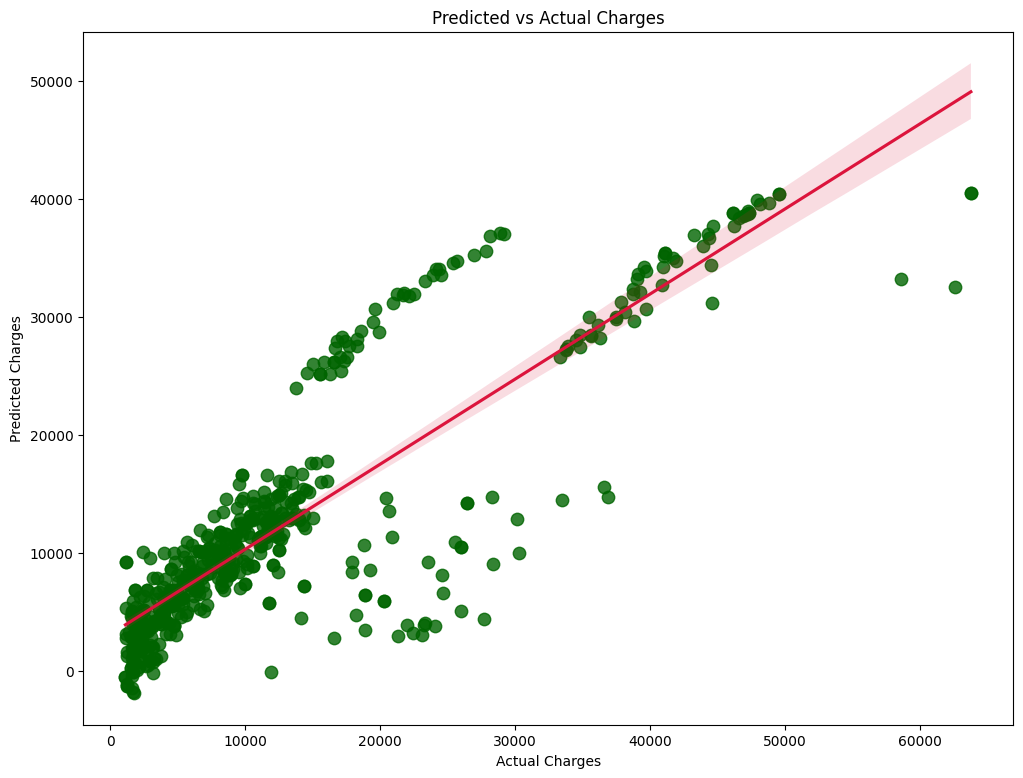

In [91]:
plt.figure(figsize=(12, 9))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 80, 'color': 'darkgreen'}, line_kws={'color': 'crimson'})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.show()

This regression plot (regplot) visualizes the relationship between actual charges (x-axis) and predicted charges (y-axis) for a model. Here are my observations:

1. General Fit of the Model
The red regression line indicates the model’s trend in predictions.
The points closely following the line suggest the model is making fairly accurate predictions.
However, some noticeable deviations from the line suggest certain areas where predictions are less reliable.
2. Outliers & Variability
Several points far from the regression line (especially on the upper right and lower parts) suggest model errors or high variance in certain predictions.
This could indicate outliers or factors the model isn’t capturing well.
3. Homoscedasticity (Constant Variance)
The scatter points appear more dispersed at higher actual charge values.
This suggests heteroscedasticity, meaning prediction errors increase for higher charges.
The model might struggle to predict high medical charges accurately.
4. Possible Improvements
Feature Engineering: Consider adding more relevant features to capture variability.
Transforming Target Variable: Log or Box-Cox transformations might help if the charge values are highly skewed.
Using Non-Linear Models: If patterns are non-linear, tree-based models (Random Forest, XGBoost) could improve performance.